# Two-site Hubbard model with electric field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.integrate import solve_ivp

In [2]:
# Hamiltonian is 3x3

U,J = 6,1

def H(E,U=U,J=J):
  return np.array([[0,-2*J,0],[-2*J,U,-E],[0,-E,U]])

print(H(0))
print()
print(H(1))

[[ 0 -2  0]
 [-2  6  0]
 [ 0  0  6]]

[[ 0 -2  0]
 [-2  6 -1]
 [ 0 -1  6]]


In [3]:
# Ground state w/ E=0

ene,psi = eigh(H(0))

assert np.allclose(ene[0],0.5*(U-np.sqrt(U**2+16*J**2)))
assert np.allclose(ene[2],0.5*(U+np.sqrt(U**2+16*J**2)))
assert np.allclose(ene[1],U)

gs = psi[:,0]

assert gs.shape == (3,)

# Check that gs is the ground state

assert np.allclose(H(0).dot(gs),ene[0]*gs)

In [4]:
# Time evolution psi_dot = -1j H psi

def psi_dot(t,psi):
    return -1j*np.matmul(H(E(t)),psi)
  
psi_0 = np.array(gs,dtype=complex)

In [5]:
# Calculation of double occupancy
# The state is in the basis \{\ket{s}, \ket{D+}, \ket{D-}\},
# that is \ket{psi} = c1\ket{s}+ c2\ket{D+} +c3\ket{D-}
# The double occupancy is therefore
# d = 0.5 * (|c2|^2+|c3|^2)

In [6]:
wd,E0 = 6.6,0.25
E = lambda t: E0*np.cos(wd*t)
time = np.arange(0,400,0.01)
psi1 = solve_ivp(fun=psi_dot,t_span=(time.min(),time.max()),y0=psi_0,t_eval=time)

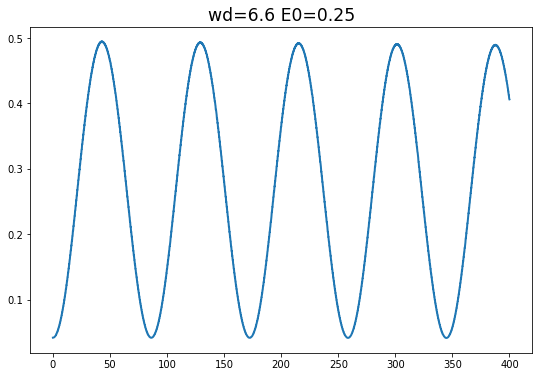

In [7]:
plt.figure(figsize=(9,6))
plt.plot(psi1.t,0.5*(np.abs(psi1.y[1])**2+np.abs(psi1.y[2])**2),lw=2)
plt.title(f'wd={wd:3.1f} E0={E0:4.2f}',fontsize='xx-large');

In [8]:
wd,E0 = 6.6,0.75

E = lambda t: E0*np.cos(wd*t)
time = np.arange(0,400,0.01)
psi2 = solve_ivp(fun=psi_dot,t_span=(time.min(),time.max()),y0=psi_0,t_eval=time)

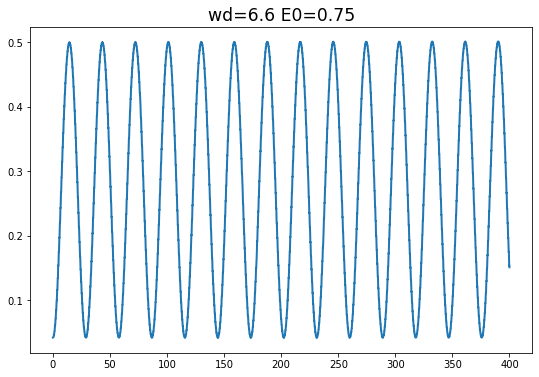

In [9]:
plt.figure(figsize=(9,6))
plt.plot(psi2.t,0.5*(np.abs(psi2.y[1])**2+np.abs(psi2.y[2])**2),lw=2)
plt.title(f'wd={wd:3.1f} E0={E0:4.2f}',fontsize='xx-large');

In [10]:
def fourier_transform(f,t):
  fw = np.fft.rfft(f)/f.shape[0]
  ws = 2*np.pi*np.fft.rfftfreq(f.shape[0],t[1]-t[0])
  return fw,ws

In [11]:
from tqdm import tqdm

E0s = np.arange(0.1,1,0.1)
wd = 6.6
wR = []

for E0 in tqdm(E0s):
  E = lambda t: E0*np.cos(wd*t)
  time = np.arange(0,400,0.01)
  psi = solve_ivp(fun=psi_dot,t_span=(time.min(),time.max()),y0=psi_0,t_eval=time)
  
  d = 0.5*(np.abs(psi.y[1])**2+np.abs(psi.y[2])**2)
  dw,ws = fourier_transform(d-d.mean(),time)
  
  wR.append(ws[np.abs(dw).argmax()])

100%|██████████| 9/9 [00:04<00:00,  1.90it/s]


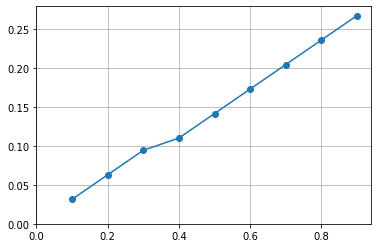

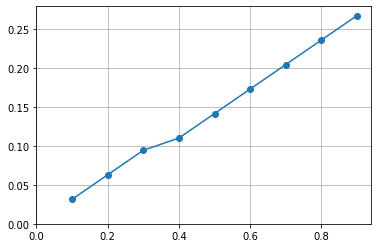

In [12]:
plt.plot(E0s,wR,'o-')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)
plt.gcf()

In [105]:
from tqdm import tqdm

E0s = np.arange(0.1,1,0.1)
wd = 3.6
wR = []

for E0 in tqdm(E0s):
  E = lambda t: E0*np.cos(wd*t)
  time = np.arange(0,400,0.01)
  psi = solve_ivp(fun=psi_dot,t_span=(time.min(),time.max()),y0=psi_0,t_eval=time)
  
  d = 0.5*(np.abs(psi.y[1])**2+np.abs(psi.y[2])**2)
  dw,ws = fourier_transform(d-d.mean(),time)
  
  dw = dw[ws<1]
  ws = ws[ws<1]

  wR.append(ws[np.abs(dw).argmax()])

100%|██████████| 9/9 [00:04<00:00,  1.81it/s]


In [87]:
%matplotlib inline

(0.0, 0.03220132469929538)

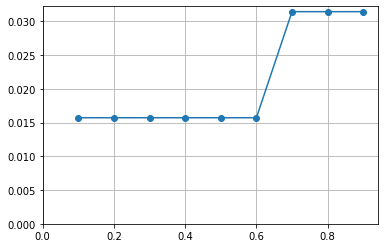

In [106]:
plt.plot(E0s,wR,'o-')
plt.grid(True)
plt.xlim(0)
plt.ylim(0)

In [94]:
wd,E0 = 3.6,0.5
E = lambda t: E0*np.cos(wd*t)
time = np.arange(0,400,0.1)
psi1 = solve_ivp(fun=psi_dot,t_span=(time.min(),time.max()),y0=psi_0,t_eval=time)

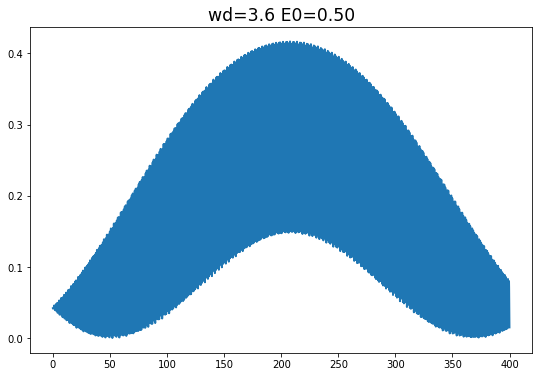

In [95]:
plt.figure(figsize=(9,6))
plt.plot(psi1.t,0.5*(np.abs(psi1.y[1])**2+np.abs(psi1.y[2])**2),lw=2)
plt.title(f'wd={wd:3.1f} E0={E0:4.2f}',fontsize='xx-large');

In [96]:
d = 0.5*(np.abs(psi1.y[1])**2+np.abs(psi1.y[2])**2)
dw,ws = fourier_transform(d-d.mean(),time)

(0.0, 6.0)

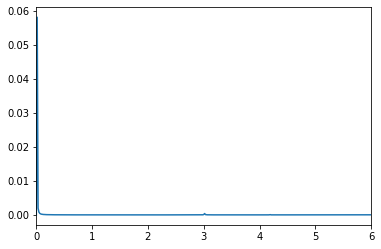

In [104]:
plt.plot(ws,np.abs(dw))
plt.xlim(0,6)